<a href="https://colab.research.google.com/github/JA2PYC/ja2pyc_green_python/blob/ch14/convolutionalNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Convolutional Neural Network
# Install Image Library
# !pip install opencv-python

# Import Image Library
import cv2 as cv
import os

# Import Data Library
import numpy as np
import pandas as pd

# Import Visualization Library
import matplotlib.pyplot as plt
import seaborn as sb

# Import Machine Learning Library
import sklearn as sk

# Import Deep Learning Library
import tensorflow as tf
import keras as kr


In [8]:
# Function Load Image Data
def load_images(path):
  fruits = {'apple': 0, 'banana': 1, 'orange' : 2}
  images = []
  labels = []

  for fruit in fruits:
    print ('Loading :', path, fruit, fruits[fruit])
    path_dir = path + '/' + fruit + '/'
    file_list = os.listdir(path_dir)

    for file_name in file_list:
      img_path = path_dir + '/' + file_name
      image = cv.imread(img_path)
      image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
      image = cv.resize(image, (150, 150))
      images.append(image)
      labels.append(fruits[fruit])

  print('Loading Complete', len(images))
  return images, labels

train_dir = '/content/drive/MyDrive/Github/ja2pyc_green_python/ch14/images/training'
test_dir = '/content/drive/MyDrive/Github/ja2pyc_green_python/ch14/images/predict'

np.random.seed(0)
tf.random.set_seed(0)

train_images, train_labels = load_images(train_dir)
train_images_arr = np.array(train_images)
train_labels_arr = np.array(train_labels)
train_images_arr = train_images_arr / 255
train_images_arr, train_images_labels = sk.utils.shuffle(train_images_arr, train_labels_arr)

Loading : /content/drive/MyDrive/Github/ja2pyc_green_python/ch14/images/training apple 0
Loading : /content/drive/MyDrive/Github/ja2pyc_green_python/ch14/images/training banana 1
Loading : /content/drive/MyDrive/Github/ja2pyc_green_python/ch14/images/training orange 2
Loading Complete 900
[[[[0.38823529 0.4        0.45882353]
   [0.36470588 0.37647059 0.43529412]
   [0.3254902  0.3372549  0.39607843]
   ...
   [0.86666667 0.89803922 0.90588235]
   [0.88627451 0.91372549 0.9372549 ]
   [0.89411765 0.92156863 0.95294118]]

  [[0.38823529 0.41176471 0.46666667]
   [0.35686275 0.38039216 0.43529412]
   [0.3254902  0.34901961 0.40392157]
   ...
   [0.85490196 0.88627451 0.89803922]
   [0.8745098  0.90196078 0.92941176]
   [0.87843137 0.90588235 0.94509804]]

  [[0.40784314 0.43137255 0.49019608]
   [0.37254902 0.39607843 0.45490196]
   [0.35686275 0.38039216 0.43921569]
   ...
   [0.8627451  0.88235294 0.91372549]
   [0.87058824 0.89411765 0.93333333]
   [0.8745098  0.89411765 0.9372549 ]]


In [14]:
# Training Model
print (train_images_arr.shape)
seq_model = kr.models.Sequential()
seq_model.add(kr.layers.Conv2D(32, (3, 3), activation='relu', input_shape= (150, 150, 3)))
seq_model.add(kr.layers.MaxPooling2D(2, 2))
seq_model.add(kr.layers.Conv2D(32, (3, 3), activation='relu'))
seq_model.add(kr.layers.MaxPooling2D(2, 2))
seq_model.add(kr.layers.Flatten())
seq_model.add(kr.layers.Dense(128, activation='relu'))
seq_model.add(kr.layers.Dense(3, activation='softmax'))

seq_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

train_history = seq_model.fit(train_images_arr, train_labels_arr, epochs = 10)
print (train_history)

(900, 150, 150, 3)
Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 961ms/step - accuracy: 0.2981 - loss: 1.6993
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 910ms/step - accuracy: 0.3893 - loss: 1.0947
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 866ms/step - accuracy: 0.4390 - loss: 1.0806
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 956ms/step - accuracy: 0.5643 - loss: 1.0092
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 942ms/step - accuracy: 0.6359 - loss: 0.8604
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 866ms/step - accuracy: 0.7155 - loss: 0.7068
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 889ms/step - accuracy: 0.7779 - loss: 0.5193
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 953ms/step - accuracy: 0.8418 - loss: 0.4739
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 949ms/step - accuracy: 0.8742 - loss: 0.3916
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9250 - loss: 0.2552


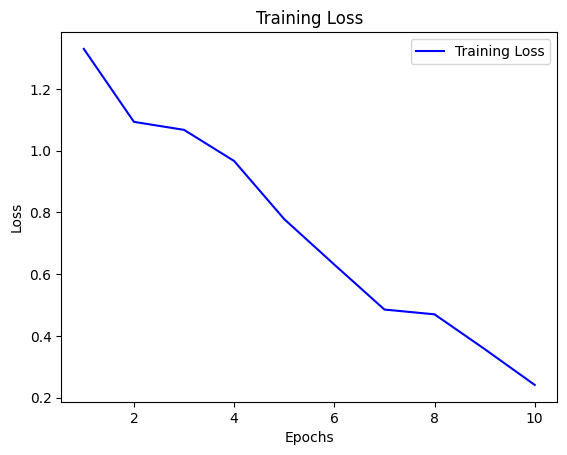

In [15]:
# Visualize Training
history_loss = train_history.history['loss']
epochs = range (1, len(history_loss) + 1)
plt.plot(epochs, history_loss, 'b', label = 'Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
# Evalulate Model
test_images, test_labels = load_images(test_dir)
test_images_arr = np.array(test_images)
test_labels_arr = np.array(test_labels)
test_images_arr = test_images_arr / 255
test_images_arr, test_labels_arr = sk.utils.shuffle(test_images_arr, test_labels_arr)
test_loss, test_acc = seq_model.evaluate(test_images_arr, test_labels_arr)
print ('Test Loss :', test_loss)
print ('Test Accuracy :' , test_acc)

Loading : /content/drive/MyDrive/Github/ja2pyc_green_python/ch14/images/predict apple 0
Loading : /content/drive/MyDrive/Github/ja2pyc_green_python/ch14/images/predict banana 1
Loading : /content/drive/MyDrive/Github/ja2pyc_green_python/ch14/images/predict orange 2
Loading Complete 300
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 368ms/step - accuracy: 0.3723 - loss: 2.4022
Test Loss : 2.462801933288574
Test Accuracy : 0.3566666543483734


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 365ms/step
Target Label : 0 Target Predict : 0 Target : 192


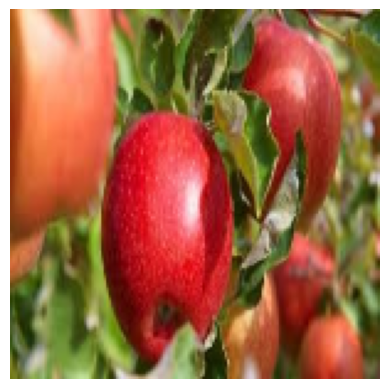

In [29]:
test_predict = seq_model.predict(test_images_arr).argmax(axis = 1)
target_int = np.random.randint(0, len(test_labels_arr))
target_img = test_images_arr[target_int]
target_label = test_labels_arr[target_int]
target_predict = test_predict[target_int]
print ('Target Label :', target_label, 'Target Predict :', target_predict, 'Target :', target_int)
plt.figure()
plt.imshow(target_img)
plt.axis('off')
plt.show()

In [31]:
print (test_labels_arr[192])
print (test_predict[192])

0
0
